In [154]:
import MetaTrader5 as mt5
import pandas as pd
import time
from datetime import datetime, timedelta
import ta
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')


Making a master dataframe which contains the OHLCV prices for currency pairs

In [155]:

mt5.initialize()

symbols = ['EURUSD', 'GBPUSD', 'AUDUSD', 'NZDUSD',  'USDCAD', 'AUDCAD', 'NZDCAD', 'AUDCHF', 'CADCHF', 'NZDCHF'  ]
timeframe = mt5.TIMEFRAME_H1
start_date = datetime(2022, 1, 1)
end_time = datetime.now()
    
def get_data(symbol, timeframe, start_date, end_time):
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_time)
    df = pd.DataFrame(rates)
    df = df[['time','close']]
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def multiple_pairs_data(symbols):
    symbols_data = {}
    for symbol in symbols:
        symbols_data[symbol] = get_data(symbol, timeframe, start_date, end_time)
    # Concatenate data for each symbol into a single DataFrame
    symbols_data_concatenated = pd.concat(symbols_data, axis=1)
    return symbols_data_concatenated


symbols_data_concatenated = multiple_pairs_data(symbols)

symbols_data_concatenated


,EURUSD,GBPUSD,AUDUSD,NZDUSD,USDCAD,AUDCAD,NZDCAD,AUDCHF,CADCHF,NZDCHF
,close,close,close,close,close,close,close,close,close,close
time,,,,,,,,,,
2022-01-01 00:00:00,1.13755,1.35232,0.72655,0.68400,1.26439,0.91862,0.86500,0.66274,0.72123,NaN
2022-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62121
2022-01-03 01:00:00,1.13726,1.35281,0.72655,0.68330,1.26344,0.91803,0.86117,0.66191,0.72085,0.62373
2022-01-03 02:00:00,1.13728,1.35206,0.72672,0.68380,1.26592,0.92003,0.86572,0.66275,0.72036,0.62511
2022-01-03 03:00:00,1.13622,1.35167,0.72653,0.68480,1.26537,0.91932,0.86642,0.66327,0.72147,0.62426
...,...,...,...,...,...,...,...,...,...,...
2024-06-07 20:00:00,1.08050,1.27257,0.65872,0.61121,1.37502,0.90572,0.84034,0.59036,0.65182,0.54779
2024-06-07 21:00:00,1.08055,1.27239,0.65871,0.61100,1.37448,0.90533,0.83974,0.59030,0.65204,0.54757


Plotting a correlation graph for the close prices of the currency pairs

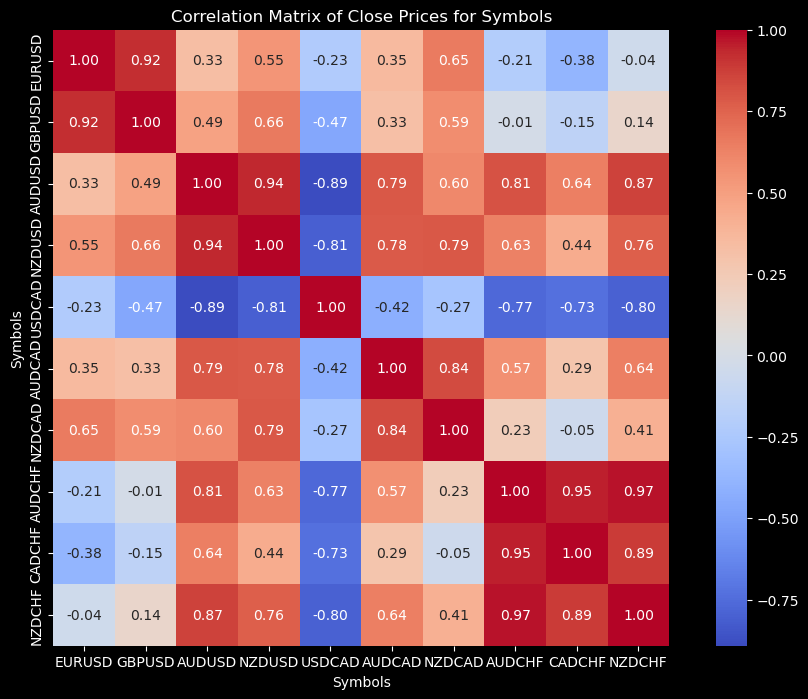

In [156]:
# Extract close prices for each symbol
close_prices = symbols_data_concatenated.xs('close', axis=1, level=1)

# Calculate correlation matrix
correlation_matrix = close_prices.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Close Prices for Symbols')
plt.xlabel('Symbols')
plt.ylabel('Symbols')
plt.show()

Plotting currency pairs so see price movement correlation


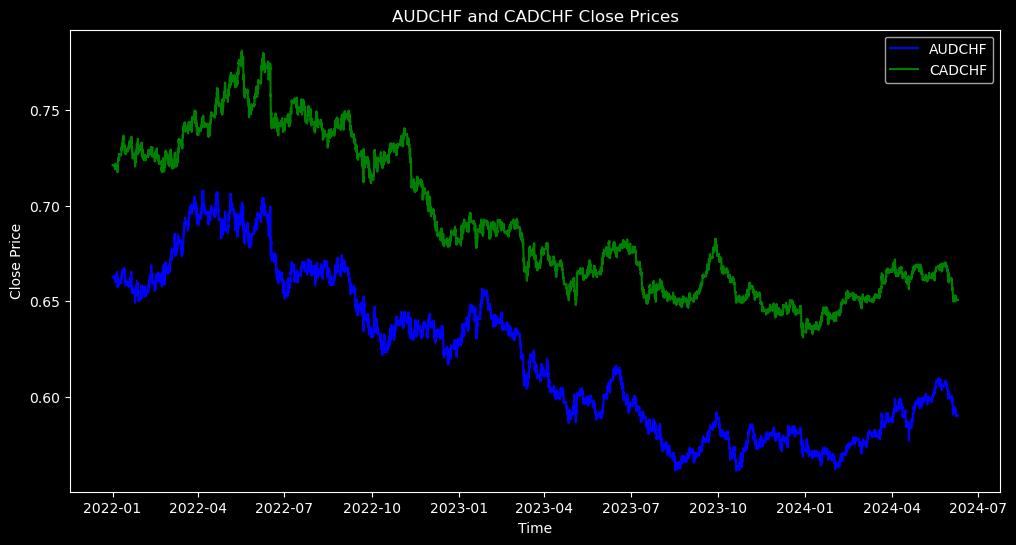

In [157]:
# Extract close prices for GBPJPY and USDJPY
symbol1 = symbols_data_concatenated['AUDCHF']['close'].dropna()
symbol2 = symbols_data_concatenated['CADCHF']['close'].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(symbol1.index, symbol1.values, label= 'AUDCHF', color='blue')
plt.plot(symbol2.index, symbol2.values, label='CADCHF', color='green')
plt.title('AUDCHF and CADCHF Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(False)
plt.show()

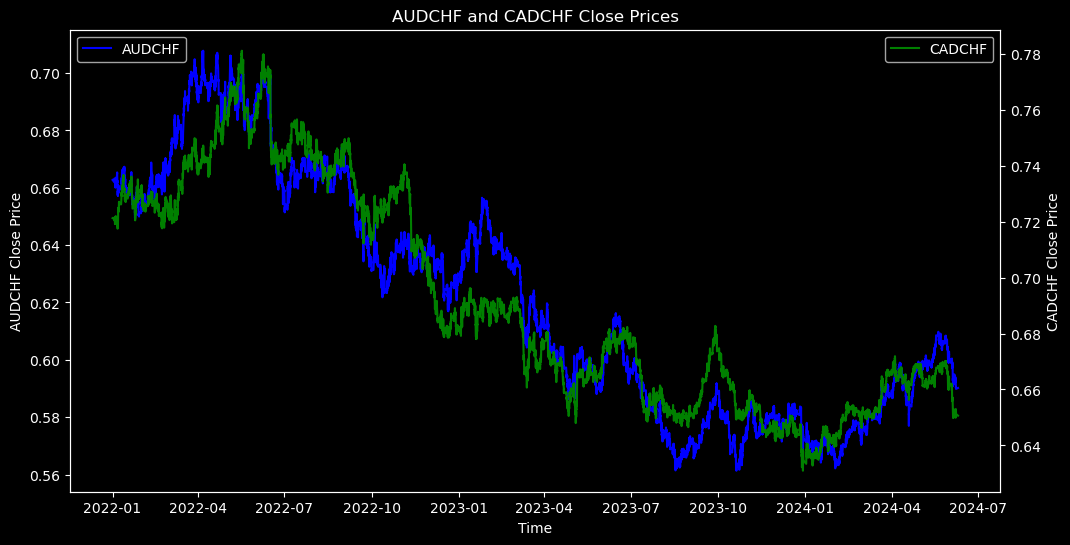

In [158]:

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GBPJPY on the first axis
ax1.plot(symbol1.index, symbol1.values, label='AUDCHF', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('AUDCHF Close Price')
ax1.tick_params('y')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot USDJPY on the second axis
ax2.plot(symbol2.index, symbol2.values, label='CADCHF', color='green')
ax2.set_ylabel('CADCHF Close Price')
ax2.tick_params('y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('AUDCHF and CADCHF Close Prices')
plt.grid(False)
plt.show()


Constructing a chart for the difference between the pairs

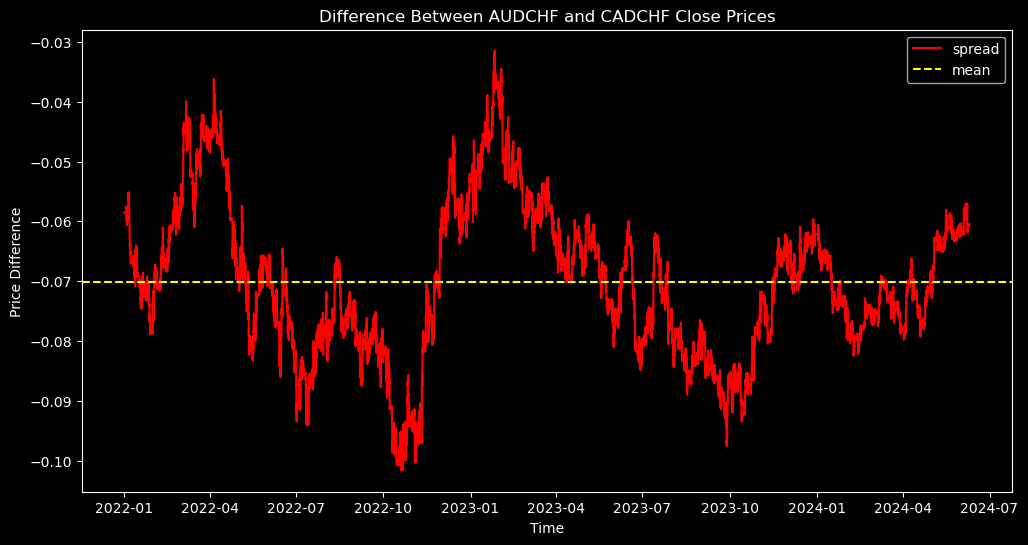

In [159]:
# Calculate the difference between USDJPY and GBPJPY close prices
price_diff = symbol1 - symbol2

price_diff = price_diff.dropna()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(price_diff.index, price_diff.values, label='Difference (AUDCHF - CADCHF)', color='red')
plt.axhline(price_diff.mean(), color = 'yellow', linestyle = '--')
plt.title('Difference Between AUDCHF and CADCHF Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.legend(['spread', 'mean'])
plt.grid(False)
plt.show()

In [160]:
# Calculate mean and standard deviation
mu = price_diff.mean()
sigma = price_diff.std()

# Calculate Z-score for each data point
z_scores = (price_diff - mu) / sigma


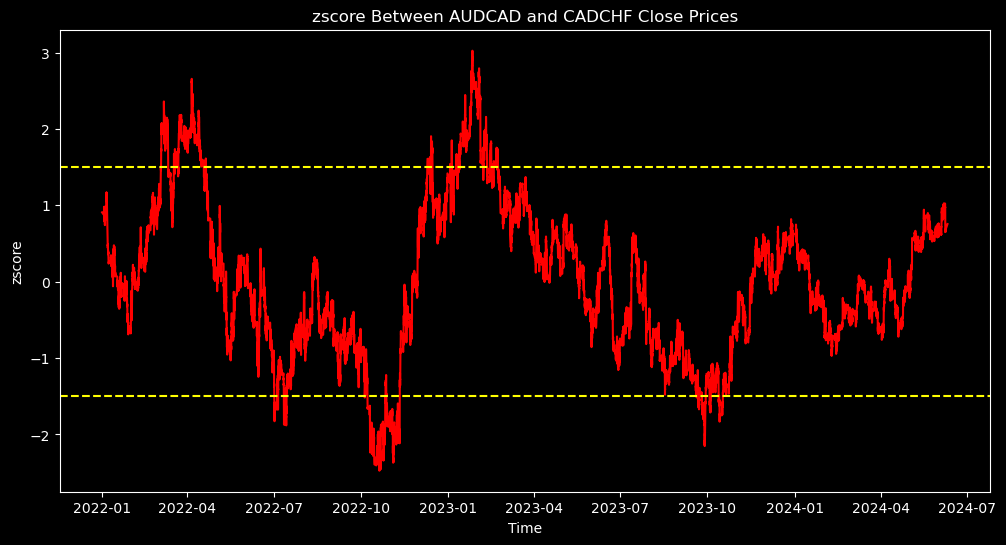

In [178]:
# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(z_scores.index, z_scores.values, label='z score (AUDCHF - CADCHF)', color='red')
plt.axhline(y = 1.5, color = 'yellow', linestyle = '--')
plt.axhline(y = -1.5, color = 'yellow', linestyle = '--')
plt.title('zscore Between AUDCAD and CADCHF Close Prices')
plt.xlabel('Time')
plt.ylabel('zscore')
plt.grid(False)
plt.show()

Cointegration

In [162]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(price_diff.dropna())

# Extracting test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. The series is stationary.')
else:
    print('Fail to reject the null hypothesis. The series is not stationary.')

ADF Statistic: -3.067986594341035
p-value: 0.029014835098281528
Reject the null hypothesis. The series is stationary.


### Strategy implementation

In [165]:
trading_data = symbols_data_concatenated[['AUDCHF', 'CADCHF']].copy()
# Creating a price difference column 
trading_data['DIFF'] = trading_data['AUDCHF'] - trading_data['CADCHF']
trading_data.columns = trading_data.columns.droplevel(1)
# Creating a z score column
trading_data['Z'] = (trading_data['DIFF'] - trading_data['DIFF'].mean())/ trading_data['DIFF'].std()
# if z score is greater than 1.5 or less than -1.5
trading_data['Signal'] = trading_data['Z'].apply(lambda z: 1 if z > 1.5 else (-1 if z < -1.5 else 0))
trading_data

,AUDCHF,CADCHF,DIFF,Z,Signal
time,,,,,
2022-01-01 00:00:00,0.66274,0.72123,-0.05849,0.908188,0
2022-01-03 00:00:00,NaN,NaN,NaN,NaN,0
2022-01-03 01:00:00,0.66191,0.72085,-0.05894,0.872932,0
2022-01-03 02:00:00,0.66275,0.72036,-0.05761,0.977133,0
2022-01-03 03:00:00,0.66327,0.72147,-0.05820,0.930908,0
...,...,...,...,...,...
2024-06-07 20:00:00,0.59036,0.65182,-0.06146,0.675498,0
2024-06-07 21:00:00,0.59030,0.65204,-0.06174,0.653561,0
2024-06-07 22:00:00,0.58999,0.65170,-0.06171,0.655912,0


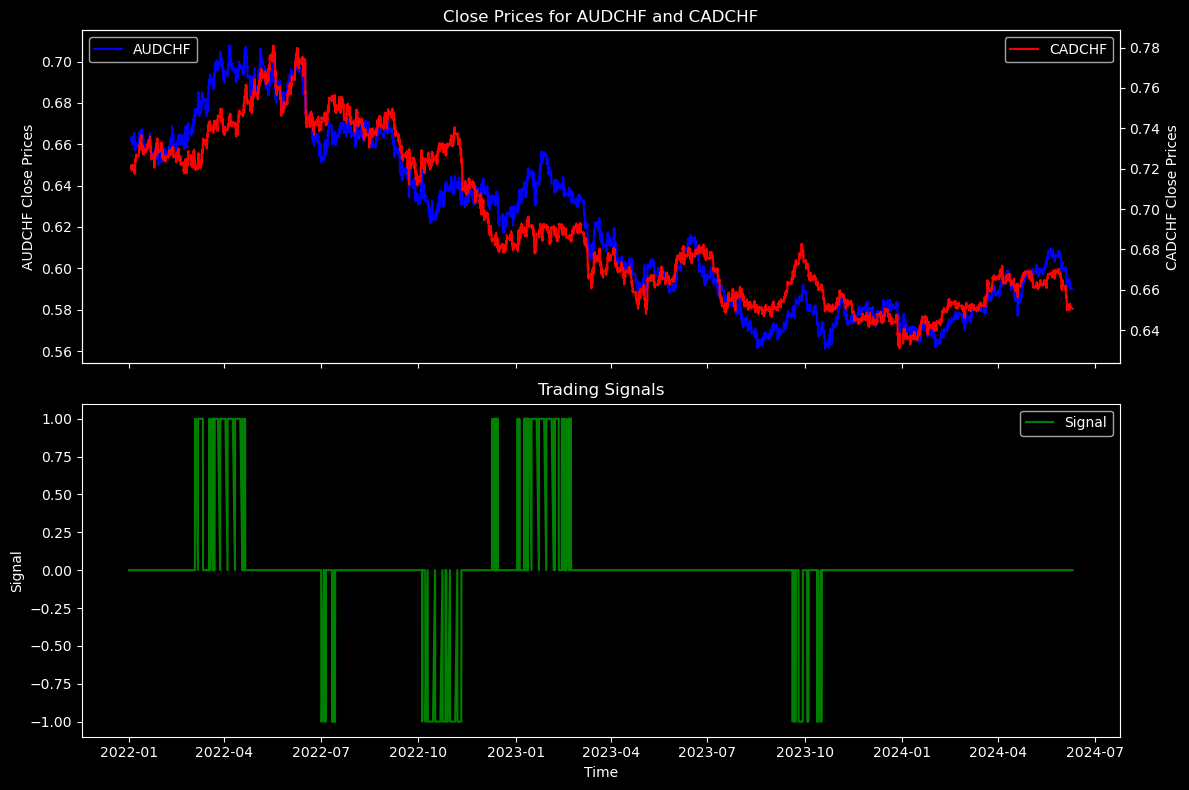

In [173]:
# Plotting the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the AUDCHF close prices
ax1.plot(trading_data.index, trading_data['AUDCHF'], label='AUDCHF', color='blue')
ax1.set_ylabel('AUDCHF Close Prices', color='white')
ax1.tick_params(axis='y', labelcolor='white')

# Create a twin y-axis to plot CADCHF close prices
ax1_twin = ax1.twinx()
ax1_twin.plot(trading_data.index, trading_data['CADCHF'], label='CADCHF', color='red')
ax1_twin.set_ylabel('CADCHF Close Prices', color='white')
ax1_twin.tick_params(axis='y', labelcolor='white')

ax1.set_title('Close Prices for AUDCHF and CADCHF')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Plot the signals
ax2.plot(trading_data.index, trading_data['Signal'], label='Signal', color='green')
ax2.set_ylabel('Signal')
ax2.set_xlabel('Time')
ax2.set_title('Trading Signals')
ax2.legend()

plt.tight_layout()
plt.show()